This file is for milestone2

In [1]:
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow
from tflearn.data_utils import VocabularyProcessor
import json
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time

enron_data_path = "./dataset/enron/enron"

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
def preprocess_one_set(data_path):
    res = []
    for root, dirs, files in os.walk(data_path):
        for file_name in files:
            cur_file_path = os.path.join(root, file_name)
            cur_txt = ""
            with open(cur_file_path) as cur_f:
                try:
                    cur_lines = cur_f.readlines()
                    for one_line in cur_lines:
                        one_line = one_line.strip('\n')
                        one_line = one_line.strip('\r')
                        cur_txt += one_line
                    res.append(cur_txt)
                except UnicodeDecodeError:
                    continue
    return res

def process_all_data():
    spam_list = []
    ham_list = []
    NUM_SET_START = 1
    NUM_SET_END = 2
    for i in range(NUM_SET_START, NUM_SET_END + 1):
        spam_path = enron_data_path + str(i) +  "/spam/"
        ham_path = enron_data_path + str(i) + "/ham/"
        cur_spam_list = preprocess_one_set(spam_path)
        cur_ham_list = preprocess_one_set(ham_path)
        spam_list += cur_spam_list
        ham_list += cur_ham_list
    return spam_list, ham_list

In [3]:
spam_list, ham_list = process_all_data()
emails_list = spam_list + ham_list
len_spam = len(spam_list)
len_ham = len(ham_list)
print("len of spam_list: ", len_spam)
print("len of ham_list: ", len_ham)
y = [1] * len_spam + [0] * len_ham

len of spam_list:  2853
len of ham_list:  8032


In [4]:
def feature_extraction_bagofwords(emails_list, num_features):
    # currently do not consider max_features
    tfidfv = TfidfVectorizer(
        decode_error = "ignore",
        analyzer = "word",
        stop_words = "english",
        smooth_idf = False,
        max_features = num_features,# at most 2010 features for two datasets
    )
    x = np.array(emails_list)
    x = tfidfv.fit_transform(x)
    x = x.toarray()
    # vocab_path = "../output/vocabulary_bagofwords.txt"
    # print("output the vocabulary to " + vocab_path + " ......\n")
    # with open(vocab_path, 'w') as f:
    #     f.write(json.dumps(tfidfv.vocabulary_))
    print("len of x: ", len(x))
    print("#features: ",len(x[0]))
    return x


def feature_extraction_vo(emails_list):
    vp = VocabularyProcessor(
        max_document_length = 1000,
        min_frequency = 1,
        vocabulary = None,
        tokenizer_fn = None
    )
    x = vp.fit_transform(emails_list)
    x = np.array(list(x))
    vocab_path = "../output/vocabulary_tf.txt"
    # with open(vocab_path, 'w') as f:
    #     f.write(json.dumps(vp.vocabulary_._mapping))
    print("len of x: ", len(x))
    return x

Support Vector Machines Algorithm

In [5]:
from sklearn import svm

def detection_svm(X_train, y_train, X_test, y_test):
    print("---Support Vector Machines Algorithm---")
    start_time = time.time()
    svm_c = svm.SVC()
    svm_c.fit(X_train, y_train)
    y_pred = svm_c.predict(X_test)
    end_time = time.time()

    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    t = end_time - start_time
    res = [t, precision, recall, f1, accuracy]
    return res

K-nearest Neighbor Algorithm (KNN)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

def detection_knn(X_train, y_train, X_test, y_test):
    print("---K-nearest Neighbor Algorithm (KNN)---")
    start_time = time.time()
    knnc = KNeighborsClassifier()
    knnc.fit(X_train, y_train)
    y_pred = knnc.predict(X_test)
    end_time = time.time()

    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    t = end_time - start_time
    res = [t, precision, recall, f1, accuracy]
    return res

Gaussian Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB

def detection_gnb(X_train, y_train, X_test, y_test):
    print("---Gaussian Naive Bayes---")
    start_time = time.time()
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    end_time = time.time()

    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    t = end_time - start_time
    res = [t, precision, recall, f1, accuracy]
    return res

Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

def detection_rf(X_train, y_train, X_test, y_test):
    print("---Random Forest---")
    start_time = time.time()
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    end_time = time.time()

    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    t = end_time - start_time
    res = [t, precision, recall, f1, accuracy]
    return res

Training and Testing

Bag of Words

In [10]:
NUM_FEATURE_ARR = [500 * i for i in range(1, 8)]
TEST_SIZE = 0.5

def bagofwords_split():
    X_train_bagofwords_arr = []
    X_test_bagofwords_arr = []
    y_train_bagofwords_arr = []
    y_test_bagofwords_arr = []

    for num_feature in NUM_FEATURE_ARR:
        x = feature_extraction_bagofwords(emails_list, num_feature)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=0)
        X_train_bagofwords_arr.append(X_train)
        X_test_bagofwords_arr.append(X_test)
        y_train_bagofwords_arr.append(y_train)
        y_test_bagofwords_arr.append(y_test)
    return X_train_bagofwords_arr, X_test_bagofwords_arr, y_train_bagofwords_arr, y_test_bagofwords_arr

X_train_bagofwords_arr, X_test_bagofwords_arr, y_train_bagofwords_arr, y_test_bagofwords_arr = bagofwords_split()

def onetest():
    res = dict()
    for i in range(0, len(NUM_FEATURE_ARR)):
        res_svm = detection_svm(X_train_bagofwords_arr[i], y_train_bagofwords_arr[i], X_test_bagofwords_arr[i], y_test_bagofwords_arr[i])
        res_knn = detection_knn(X_train_bagofwords_arr[i], y_train_bagofwords_arr[i], X_test_bagofwords_arr[i], y_test_bagofwords_arr[i])
        res_gnb = detection_gnb(X_train_bagofwords_arr[i], y_train_bagofwords_arr[i], X_test_bagofwords_arr[i], y_test_bagofwords_arr[i])
        #res_kmeans = detection_kmeans(X_train_bagofwords_arr[i], y_train_bagofwords_arr[i], X_test_bagofwords_arr[i], y_test_bagofwords_arr[i], 2)
        res_rf = detection_rf(X_train_bagofwords_arr[i], y_train_bagofwords_arr[i], X_test_bagofwords_arr[i], y_test_bagofwords_arr[i])
        #temp = [res_svm, res_knn, res_gnb, res_kmeans, res_rf]
        temp = [res_svm, res_knn, res_gnb, res_rf]
        res[NUM_FEATURE_ARR[i]] = temp
    return res

res = onetest()

len of x:  10885
#features:  500
len of x:  10885
#features:  1000
len of x:  10885
#features:  1500
len of x:  10885
#features:  2000
len of x:  10885
#features:  2500
len of x:  10885
#features:  3000
len of x:  10885
#features:  3500
---Support Vector Machines Algorithm---
---K-nearest Neighbor Algorithm (KNN)---
---Gaussian Naive Bayes---
---Random Forest---
---Support Vector Machines Algorithm---
---K-nearest Neighbor Algorithm (KNN)---
---Gaussian Naive Bayes---
---Random Forest---
---Support Vector Machines Algorithm---
---K-nearest Neighbor Algorithm (KNN)---
---Gaussian Naive Bayes---
---Random Forest---
---Support Vector Machines Algorithm---
---K-nearest Neighbor Algorithm (KNN)---
---Gaussian Naive Bayes---
---Random Forest---
---Support Vector Machines Algorithm---
---K-nearest Neighbor Algorithm (KNN)---
---Gaussian Naive Bayes---
---Random Forest---
---Support Vector Machines Algorithm---
---K-nearest Neighbor Algorithm (KNN)---
---Gaussian Naive Bayes---
---Random Fores

In [11]:
import matplotlib.pyplot as plt
#[res_svm, res_knn, res_gnb, res_rf]
#[t, precision, recall, f1, accuracy]
def f_plot(idx):
    fig, ax = plt.subplots()
    plt_x_label = NUM_FEATURE_ARR
    plt_y_svm = [res[i][0][idx] for i in NUM_FEATURE_ARR]
    ax.plot(plt_x_label, plt_y_svm, label = "SVM")

    plt_y_knn = [res[i][1][idx] for i in NUM_FEATURE_ARR]
    ax.plot(plt_x_label, plt_y_knn, label = "KNN")

    plt_y_gnb = [res[i][2][idx] for i in NUM_FEATURE_ARR]
    ax.plot(plt_x_label, plt_y_gnb, label = "GNB")

    # plt_y_kmeans = [res[i][3][idx] for i in NUM_FEATURE_ARR]
    # ax.plot(plt_x_label, plt_y_kmeans, label = "K-means")

    plt_y_rf = [res[i][3][idx] for i in NUM_FEATURE_ARR]
    ax.plot(plt_x_label, plt_y_rf, label = "Random Forest")

    cur_title = ""
    if idx == 0:
        cur_title = "Time"
    elif idx == 1:
        cur_title = "Precision"
    elif idx == 2:
        cur_title = "Recall"
    elif idx == 3:
        cur_title = "F1"
    elif idx == 4:
        cur_title = "Accuracy"

    ax.set_xlabel("Number of Features")
    ax.set_ylabel(cur_title)
    ax.set_title(cur_title + " and Number of Features")
    ax.legend()

    plt.show()


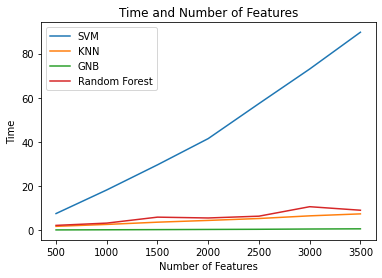

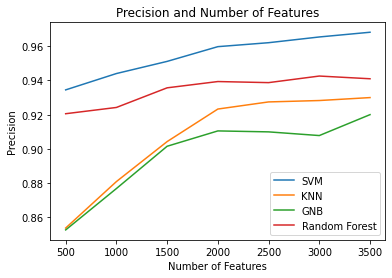

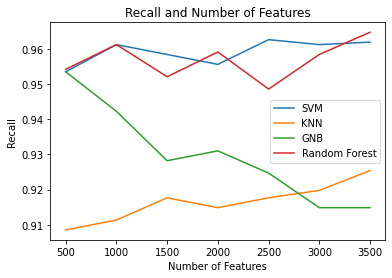

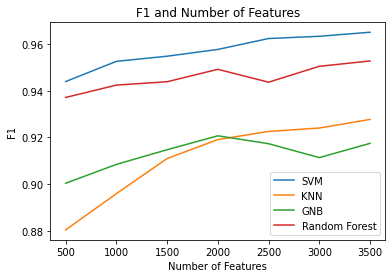

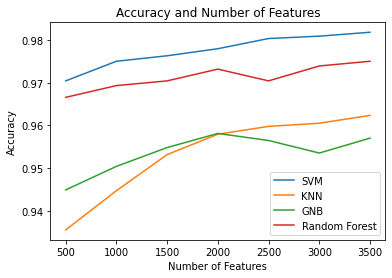

In [12]:
for i in range(5):
    f_plot(i)

Test for K-means

---K-means Clustering---
---K-means Clustering---
---K-means Clustering---
---K-means Clustering---
---K-means Clustering---
---K-means Clustering---
---K-means Clustering---


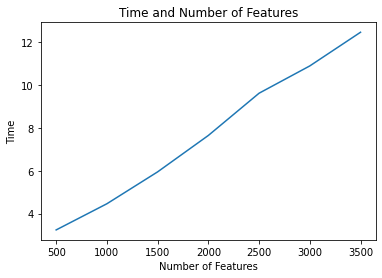

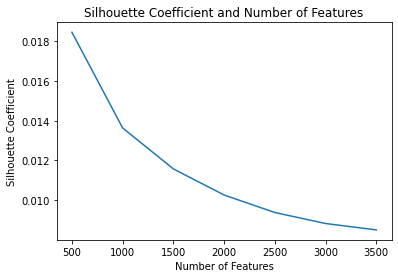

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def detection_kmeans(X_train, y_train, X_test, y_test, num_clusters):
    print("---K-means Clustering---")
    start_time = time.time()

    kmc = KMeans(n_clusters = num_clusters)
    kmc.fit(X_train)
    labels = kmc.labels_
    sh = silhouette_score(X_train, labels)

    end_time = time.time()

    t = end_time - start_time
    res = [t, sh]
    return res

def plt_kmeans():
    t_arr = []
    sh_arr = []
    for i in range(len(X_train_bagofwords_arr)):
        cur_res = detection_kmeans(X_train_bagofwords_arr[i], y_train_bagofwords_arr[i],\
                        X_test_bagofwords_arr[i], y_test_bagofwords_arr[i], 2)
        t_arr.append(cur_res[0])
        sh_arr.append(cur_res[1])

    fig1, ax1 = plt.subplots()
    plt_x_label = NUM_FEATURE_ARR
    ax1.plot(plt_x_label, t_arr)
    ax1.set_xlabel("Number of Features")
    ax1.set_ylabel("Time")
    ax1.set_title("Time and Number of Features")
    plt.show()

    fig2, ax2 = plt.subplots()
    plt_x_label = NUM_FEATURE_ARR
    ax2.plot(plt_x_label, sh_arr)
    ax2.set_xlabel("Number of Features")
    ax2.set_ylabel("Silhouette Coefficient")
    ax2.set_title("Silhouette Coefficient and Number of Features")
    plt.show()
    
plt_kmeans()

VO

In [14]:
TEST_SIZE = 0.5

x = feature_extraction_vo(emails_list)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=0)

ModuleNotFoundError: ignored

In [ ]:
res_svm = detection_svm(X_train, y_train, X_test, y_test)
res_knn = detection_knn(X_train, y_train, X_test, y_test)
res_gnb = detection_gnb(X_train, y_train, X_test, y_test)
res_rf = detection_rf(X_train, y_train, X_test, y_test)

In [ ]:
vo_res = [res_svm, res_knn, res_gnb, res_rf]

def plt_vo(idx):
    cur = [vo_res[i][idx] for i in range(4)]
    plt.barh(range(4), cur)
    plt.yticks(range(4), ["SVM", "KNN", "GNB", "Random Forest"])
    if idx == 0: 
        plt.xlim(0, 8)
    else:
        plt.xlim(0, 1)
    plt.xlabel("Score")
    cur_title = ""
    if idx == 0:
        cur_title = "Time"
    elif idx == 1:
        cur_title = "Precision"
    elif idx == 2:
        cur_title = "Recall"
    elif idx == 3:
        cur_title = "F1"
    elif idx == 4:
        cur_title = "Accuracy"
    plt.title(cur_title)
    plt.show()

for i in range(5):
    plt_vo(i)

In [ ]:
res_kmeans = detection_kmeans(X_train, y_train, X_test, y_test, 2)
print("vo_kmeans_time: ", res_kmeans[0])
print("vo_kmeans_silhouette_coefficient: ", res_kmeans[1])